<a href="https://colab.research.google.com/github/sejalagrawal/selfdrivecar_1/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random




In [24]:
np.random.seed(0)

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [26]:
assert(X_train.shape[0]==y_train.shape[0]), "The no of images not equal to no of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The no of images not equal to no of labels"
assert(X_train.shape[1:]== (28,28)),"Image dimention is not 28X28"
assert(X_test.shape[1:]== (28,28)),"Image dimention is not 28X28"

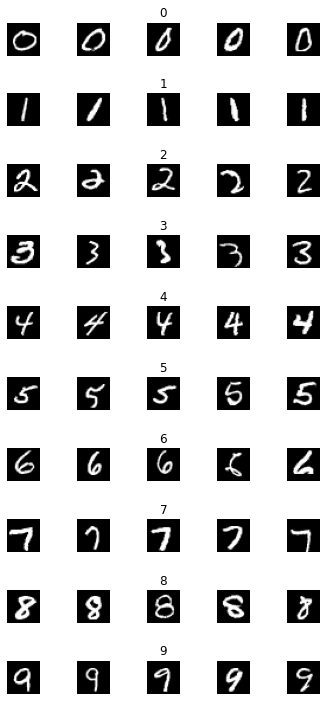

In [9]:
num_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_samples.append(len(x_selected))
      

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


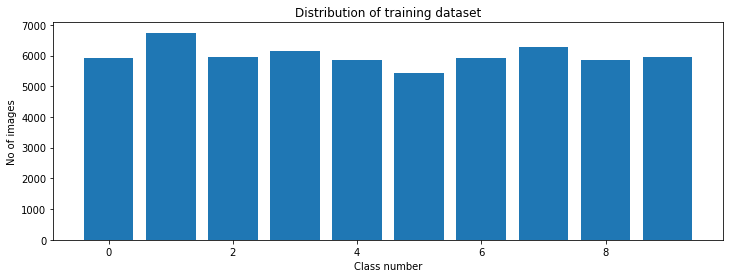

In [10]:
print(num_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("No of images")
plt.show()

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
#define leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation = 'relu', strides = 1, padding = 'valid' ) ) #valid padding is default, stride=1 is default
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15,(3,3), activation = 'relu' ))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))  # fraction of input layers dropped
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [14]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
his = keras.callbacks.History()
model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1, callbacks=[his])

Epoch 1/10
135/135 [==============================] - 45s 12ms/step - loss: 0.5380 - accuracy: 0.8199 - val_loss: 0.0635 - val_accuracy: 0.9833
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0711 - accuracy: 0.9774 - val_loss: 0.0603 - val_accuracy: 0.9845
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0349 - val_accuracy: 0.9912
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0348 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0395 - val_accuracy: 0.9902
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0361 - val_accuracy: 0.9908
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoc

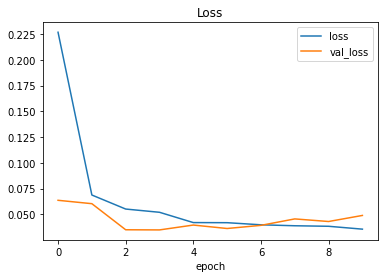

In [16]:

his.history.keys()
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

Text(0.5, 0, 'epoch')

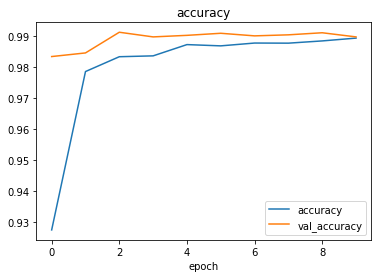

In [17]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')


<Response [200]>


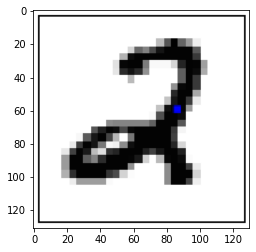

In [18]:
import requests
from PIL import Image
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-3.png'
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img, cmap = plt.get_cmap('gray'))

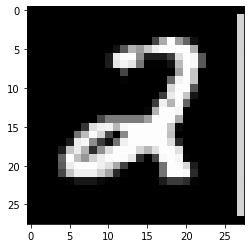

In [19]:
import cv2
img_array = np.asarray(img)
#print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
#print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
#print(image)


In [20]:
image - image/255
image = image.reshape(1,28,28,1)


In [21]:
prediction = model.predict_classes(image)
print("predicted digit", str( prediction))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predicted digit [2]


In [22]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score : ', score[0])
print('Test accuracy : ', score[1])

<class 'list'>
Test score :  0.03968951478600502
Test accuracy :  0.9894999861717224


In [30]:
layer1 = Model( model.layers[0].input,model.layers[0].output)
layer2 = Model( model.layers[0].input, model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


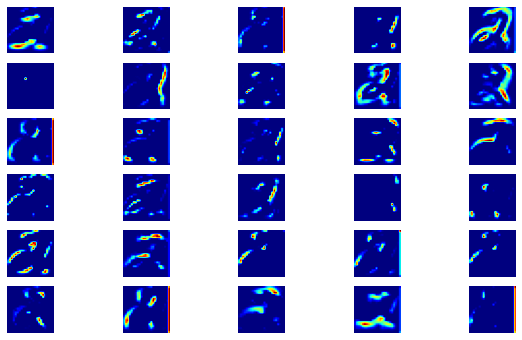

In [32]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0, :, :, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')

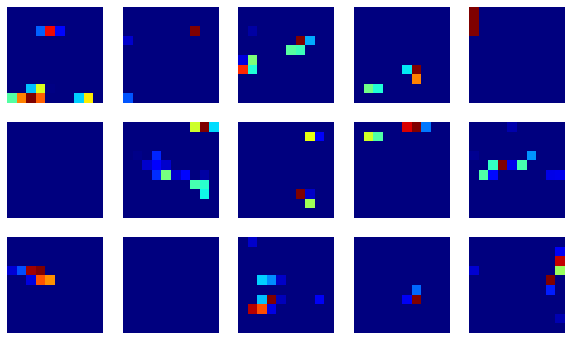

In [33]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0, :, :, i],cmap=plt.get_cmap('jet'))
  plt.axis('off')